In [1]:
from skimage import io
import numpy as np
import os
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
import gzip
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
def calcQCmat(andata):
    andata.var_names_make_unique()
    andata.var["mt"] = andata.var_names.str.startswith("mt-")
    andata.var["ribo"] = andata.var_names.str.startswith(("RPS", "RPL"))
    andata.var["hb"] = andata.var_names.str.contains("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(andata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)
    return andata

In [7]:
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out"

## Data reading

In [3]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
andata016 = calcQCmat(andata016_)
print(f"{np.shape(andata016.X.todense())}")
sc.pp.filter_cells(andata016, min_counts = 50)
sc.pp.filter_cells(andata016, min_genes = 80)
print(f"{np.shape(andata016.X.todense())}")
andata016 = andata016[andata016.obs["pct_counts_mt"] < 20]
print(f"{np.shape(andata016.X.todense())}")
sc.pp.normalize_total(andata016)
sc.pp.log1p(andata016)
sc.pp.highly_variable_genes(andata016)
sc.pp.scale(andata016)
andata016.obsm['spatial'] = np.array(andata016.obsm['spatial'], dtype=np.float64)

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/readwrite.py:476: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/li

(98917, 19059)
(98697, 19059)
(97163, 19059)


/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


<center><h3>Single-Cell Analysis Pipeline (Conventional)

In [20]:
from matplotlib.backends.backend_pdf import PdfPages
# first preform PCA:
sc.tl.pca(andata016, n_comps=50, use_highly_variable=True)
# then insted of using scanpy PCA ploting  
# sc.pl.pca_variance_ratio(andata016, log=True, n_pcs=50)
# creat a custom PCA ploting

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Calculate the variance ratios
pca = andata016.uns['pca']
explained_variance_ratio = np.log(pca['variance_ratio'])


with PdfPages(os.path.join(pathout, f'Principal_Component_VR_16um.pdf')) as pdf:
    # Create your own plot
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    fig, axs = plt.subplots(1, 1, figsize=(4, 3))

    n_pcs = 50

    # Plot the variance ratios and label the data points
    for i in range(n_pcs):
        x = i+1
        y = explained_variance_ratio[i]
        label = 'PC' + str(x)
        axs.plot(x, y, '')  # plots a blue circle marker
        axs.text(x, y, label, ha='right',fontsize = 4)  # positions text label at data point

    axs.set_xlabel('Principal Component')
    axs.set_ylabel('Variance Ratio')

    # Specify number of ticks on the y-axis
    ax = plt.gca()  # get current axes
    ax.yaxis.set_major_locator(ticker.MaxNLocator(10)) 
    fig.tight_layout()
    pdf.savefig()
    plt.close()

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_74485/2983688757.py", line 3, in <module>
    sc.tl.pca(andata016, n_comps=50, use_highly_variable=True)
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py", line 194, in pca
    X = _get_obs_rep(adata_comp, layer=layer)
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/get/get.py", line 437, in _get_obs_rep
    return adata.X
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py", line 591, in X
    _subset(self._adata_ref.X, (self._oidx, self._vidx)),
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/functools.py", line 889, in wrapper
    return dispatch(args[0]._

TypeError: object of type 'NoneType' has no len()

In [4]:
sc.pp.pca(andata016, n_comps=10)
sc.pp.neighbors(andata016)
sc.tl.umap(andata016)
sc.tl.leiden(andata016, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

In [5]:
andata016.obs['clusters']

s_016um_00052_00082-1     0
s_016um_00150_00268-1     5
s_016um_00144_00175-1     6
s_016um_00165_00109-1     6
s_016um_00297_00147-1    13
                         ..
s_016um_00109_00223-1     0
s_016um_00039_00175-1     5
s_016um_00037_00193-1     9
s_016um_00144_00329-1     1
s_016um_00176_00108-1     6
Name: clusters, Length: 97163, dtype: category
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '14']

In [8]:
with PdfPages(os.path.join(pathout, f'Single_Cell_Analysis_Conventional_16um_scatter.pdf')) as pdf:
    # Set the plot parameters
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    # Create the figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Plot the spatial scatter plot on the specified axis
    sq.pl.spatial_scatter(andata016, color="clusters", ax=ax)

    #     # Remove the legend
    #     ax.get_legend().remove()

    # Adjust layout and save to PDF
    #     fig.tight_layout()
    pdf.savefig()
    plt.close()

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


<center><h3> Spatial Information Only 

In [9]:
sq.gr.spatial_neighbors(andata016, n_rings=8, coord_type="grid", n_neighs=10)
#sq.gr.spatial_neighbors(andata016, n_rings=4, coord_type="generic", n_neighs=4, radius= 50, delaunay=True)
andata016.uns['neighbors'] = {
    'connectivities': andata016.obsp['spatial_connectivities'],
    'distances': andata016.obsp['spatial_distances']
}
sc.tl.leiden(andata016, key_added="clusters",flavor="igraph", directed=False, n_iterations=2,resolution=0.5)
andata016.obs['clusters']

s_016um_00052_00082-1    0
s_016um_00150_00268-1    1
s_016um_00144_00175-1    5
s_016um_00165_00109-1    5
s_016um_00297_00147-1    0
                        ..
s_016um_00109_00223-1    1
s_016um_00039_00175-1    2
s_016um_00037_00193-1    2
s_016um_00144_00329-1    2
s_016um_00176_00108-1    5
Name: clusters, Length: 97163, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

/tmp/ipykernel_77159/3948542610.py:1: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages(os.path.join(pathout, f'Spatial_Information_Only_16um.pdf')) as pdf:


ValueError: Expected palette to be of length `11`, found `15`. Removing the colors in `adata.uns` with `adata.uns.pop('clusters_colors')` may help.

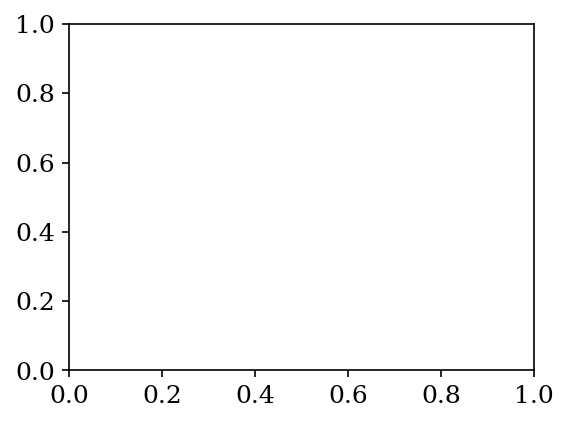

In [10]:
with PdfPages(os.path.join(pathout, f'Spatial_Information_Only_16um.pdf')) as pdf:
    # Set the plot parameters
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    # Create the figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Plot the spatial scatter plot on the specified axis
    sq.pl.spatial_scatter(andata016, color="clusters", ax=ax)

    #     # Remove the legend
    #     ax.get_legend().remove()

    # Adjust layout and save to PDF
    #     fig.tight_layout()
    pdf.savefig()
    plt.close()